In [3]:
import os
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
from matplotlib.colors import ListedColormap


/var/folders/ds/m99bkpnj259b134j14wqv52w0000gn/T/ipykernel_56785/3228591520.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


In [4]:
# data
os.chdir("/Users/sanelmaheinonen/Documents/ETH Sem 2/StatsLab/Air-Quality-Gaussian-Process/Data")
df = pd.read_csv("Z_val_test_old.csv")

df = pd.read_csv("df_res.csv")

In [5]:
df.head()

,latitude,longitude,predicted_value,predicted_variance,z_val
0,-2.159996,29.90013,0.879007,900.081781,0.032299
1,-2.158444,29.90013,0.890754,898.946452,0.032711
2,-2.156892,29.90013,0.902758,897.816223,0.033132
3,-2.155340,29.90013,0.915024,896.691290,0.033563
4,-2.153788,29.90013,0.927558,895.571840,0.034002


In [6]:
x = df.longitude.unique()
y = df.latitude.unique()

# needs to be meshgrid format for contour plot to work
X, Y = np.meshgrid(x, y)

# looking up z-value from X and Y values
def f(x, y):
    return df.loc[(df['longitude'] == x) & (df['latitude'] == y), 'z_val'].item()

# need to define Z on meshgrid 
vectorized_f = np.vectorize(f)
Z = vectorized_f(X, Y)





In [7]:
# defining color palette
my_palette = ['#2C7BB6', '#00A6CA', '#00CCBC', '#90EB9D', '#FFFF8C', '#F9D057', '#F29E2E', '#E76818', '#D7191C']
color_map = ListedColormap(my_palette)


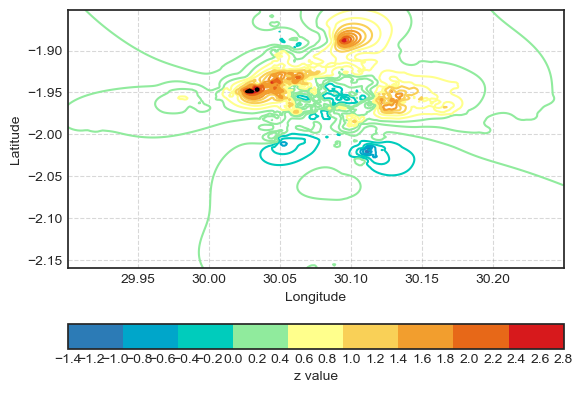

In [8]:
#creating figure
fig, ax = plt.subplots()

#adding contour plot: z values and contour map with z= 2.575 cutoff
contour = plt.contour(X, Y, Z, 20, cmap = color_map)
contour_cutoff =  plt.contour(X, Y, Z>2.575,  colors = "black")

ax.yaxis.grid(color='gray', linestyle='dashed', alpha = 0.3)
ax.xaxis.grid(color='gray', linestyle='dashed', alpha = 0.3)

# color bar legend
norm = matplotlib.colors.Normalize(vmin=contour.cvalues.min(), vmax=contour.cvalues.max())
sm = plt.cm.ScalarMappable(norm=norm, cmap = contour.cmap)
sm.set_array([])
fig.colorbar(sm, ticks=contour.levels, ax = ax,
             orientation = "horizontal", label = "z value")


plt.xlabel("Longitude")
plt.ylabel("Latitude")

plt.show()
